# Data Analysis of Data Science Nigeria 2021 BootCamp Finalist

In [1]:
import requests

response = requests.get("https://www.datasciencenigeria.org/2021-bootcamp-finalists/")
print(response.text)

<!DOCTYPE html>
<html lang="en-US">
<head>
	<meta charset="UTF-8">
		<meta name='robots' content='index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1' />

	<!-- This site is optimized with the Yoast SEO plugin v17.4 - https://yoast.com/wordpress/plugins/seo/ -->
	<title>Data Science Nigeria Artificial Intelligence Bootcamp Finalists</title>
	<meta name="description" content="These are the TOP 400 people who passed the Data Science Nigeria Hackathon. They have secured passes into the largest Artificial Intelligence gathering of the best of the best, taught and mentored by world-class experts." />
	<link rel="canonical" href="https://www.datasciencenigeria.org/2021-bootcamp-finalists/" />
	<meta property="og:locale" content="en_US" />
	<meta property="og:type" content="article" />
	<meta property="og:title" content="Data Science Nigeria Artificial Intelligence Bootcamp Finalists" />
	<meta property="og:description" content="These are the TOP 400 people who passed

In [2]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.title)

<title>Data Science Nigeria Artificial Intelligence Bootcamp Finalists</title>


In [3]:
pwd

'C:\\Users\\AMA\\Data Science Competitions'

# Scrape Data if in Table on the website

In [4]:
import requests
import lxml.html as lh
import pandas as pd

In [5]:
url = 'https://www.datasciencenigeria.org/2021-bootcamp-finalists/'

page = requests.get(url)

doc = lh.fromstring(page.content)

tr_elements = doc.xpath('//tr')

In [6]:
#Check the length of the first 12 rows
[len(T) for T in tr_elements[:12]]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [7]:
col = []
i = 0

for t in tr_elements[0]:
    i += 1
    name = t.text_content()
    print('%d:"%s"'%(i, name))
    col.append((name, []))

1:"S/N"
2:"Bootcamp ID"
3:"Full Name"
4:"Gender"
5:"AI+ Community"


In [8]:
for j in range(1, len(tr_elements)):
    T = tr_elements[j]
    
    try:
        i = 0
        for t in T.iterchildren():
            data = t.text_content()
            
            if i >0:
                try:
                    data = int(data)
                except:
                    pass
            col[i][1].append(data)
            i += 1
    except:
        if len(T) != 5:
            print('ExceptionError: len of row greater than 5')

In [9]:
[len(C) for (title, C) in col]

[403, 403, 403, 403, 403]

In [10]:
Dict = {title:col for (title,col) in col}
df = pd.DataFrame(Dict)

df.head()

,S/N,Bootcamp ID,Full Name,Gender,AI+ Community
0,1,AIB21/182,Aanuoluwapo Liasu,Male,None
1,2,AIB21/254,Abass Olaiya,Male,City- AI+ Ibadan
2,3,AIB21/131,Abdul-Baaqi Jempeji,Male,City- AI+ Calabar
3,4,AIB21/231,Abdulazeez Jimoh,Male,City- AI+ Abeokuta
4,5,AIB21/286,AbdulHameed Babatunde,Male,Campus- AI+ FUTA


# save data to .csv file for ease of analysis

In [11]:
import numpy as np
df.to_csv('dsn2021_bootcamp_finalist.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('dsn2021_bootcamp_finalist.csv')
data.head()

,S/N,Bootcamp ID,Full Name,Gender,AI+ Community
0,1,AIB21/182,Aanuoluwapo Liasu,Male,None
1,2,AIB21/254,Abass Olaiya,Male,City- AI+ Ibadan
2,3,AIB21/131,Abdul-Baaqi Jempeji,Male,City- AI+ Calabar
3,4,AIB21/231,Abdulazeez Jimoh,Male,City- AI+ Abeokuta
4,5,AIB21/286,AbdulHameed Babatunde,Male,Campus- AI+ FUTA


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S/N,403.0,202.0,116.480327,1.0,101.5,202.0,302.5,403.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S/N            403 non-null    int64 
 1   Bootcamp ID    403 non-null    object
 2   Full Name      403 non-null    object
 3   Gender         403 non-null    object
 4   AI+ Community  403 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.9+ KB


# EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data['Gender'].value_counts()

Male      321
Female     82
Name: Gender, dtype: int64

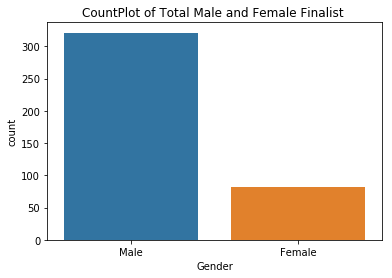

In [6]:
plt.title('CountPlot of Total Male and Female Finalist ')
sns.countplot(data['Gender'])

([<matplotlib.patches.Wedge at 0x89c43d79e8>,
 [Text(-1.32421,0.984356,'Male'), Text(1.32421,-0.984356,'Female')])

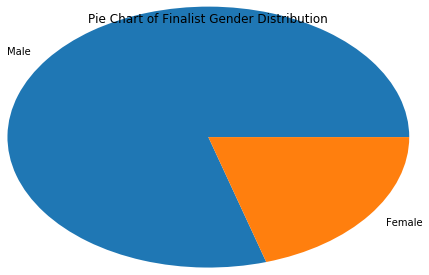

In [7]:
plt.title('Pie Chart of Finalist Gender Distribution')
plt.pie(data['Gender'].value_counts(),
        labels=['Male', 'Female'], radius=1.5)

In [8]:
data['AI+ Community'].value_counts()

Campus- AI+ OAU            66
None                       60
Campus- AI+ UNILAG         47
Campus- AI+ UI             37
Campus- AI+ FUNAAB         30
Campus- AI+ FUTA           29
City- AI+ Port Harcourt    12
City- AI+ Ibadan           12
City- AI+ Uyo              11
Campus- AI+ FUT            11
City- AI+ Abeokuta         11
Campus- AI+ FUOYE           9
City- AI+ Abuja             9
Campus- AI+ LASU            8
Campus- AI+ UNILORIN        8
Campus- AI+ UNIBEN          8
City- AI+ Owerri            6
Campus- AI+ LAUTECH         5
City- AI+ Enugu             5
City- AI+ Bauchi            3
Campus- AI+ BUK             3
City- AI+ Ado-Ekiti         2
City- AI+ Benin             2
City- AI+ Kaduna            1
City- AI+ Ijebu-Ode         1
City- AI+ Osogbo            1
City- AI+ Calabar           1
City- AI+ Kano              1
City- AI+ Jos               1
City- AI+ Gombe             1
City- AI+ Ilorin            1
Campus- AI+ FUPRE           1
Name: AI+ Community, dtype: int64

# Feature Enginnering

In [9]:
df = data.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
def shorts(val):
    ll = val.split('AI+ ')[-1]
    return ll

def location(val):
    ll = val.split('- AI+ ')[0]
    return ll
# def alphabetical(val):
#     if val[0] == 'A':
#         return 'A'

In [12]:
df['Schools'] = df['AI+ Community'].map(shorts)

In [13]:
df['Community_type'] = df['AI+ Community'].map(location)

In [14]:
df['School_enc'] = encoder.fit_transform(df['AI+ Community'])

In [15]:
df.head()

,S/N,Bootcamp ID,Full Name,Gender,AI+ Community,Schools,Community_type,School_enc
0,1,AIB21/182,Aanuoluwapo Liasu,Male,None,None,None,31
1,2,AIB21/254,Abass Olaiya,Male,City- AI+ Ibadan,Ibadan,City,21
2,3,AIB21/131,Abdul-Baaqi Jempeji,Male,City- AI+ Calabar,Calabar,City,18
3,4,AIB21/231,Abdulazeez Jimoh,Male,City- AI+ Abeokuta,Abeokuta,City,13
4,5,AIB21/286,AbdulHameed Babatunde,Male,Campus- AI+ FUTA,FUTA,Campus,5


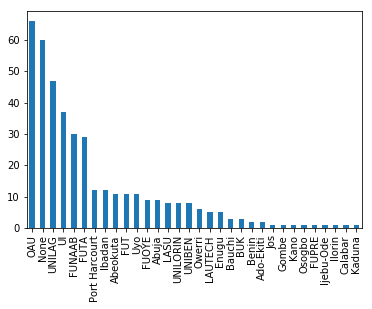

In [16]:
df.Schools.value_counts().plot.bar()

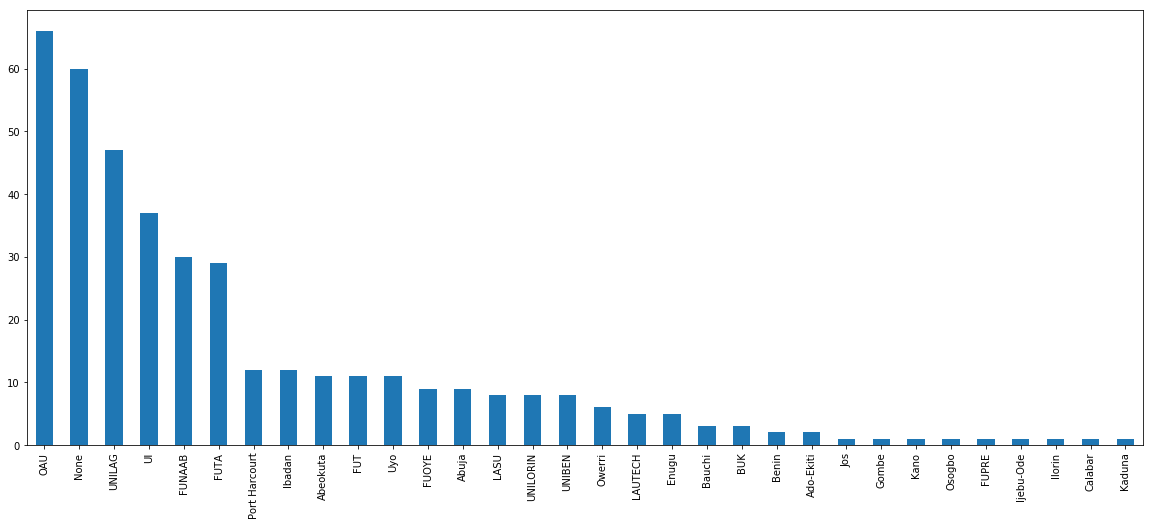

In [17]:
plt.figure(figsize=(20,8))

df.Schools.value_counts().plot.bar()

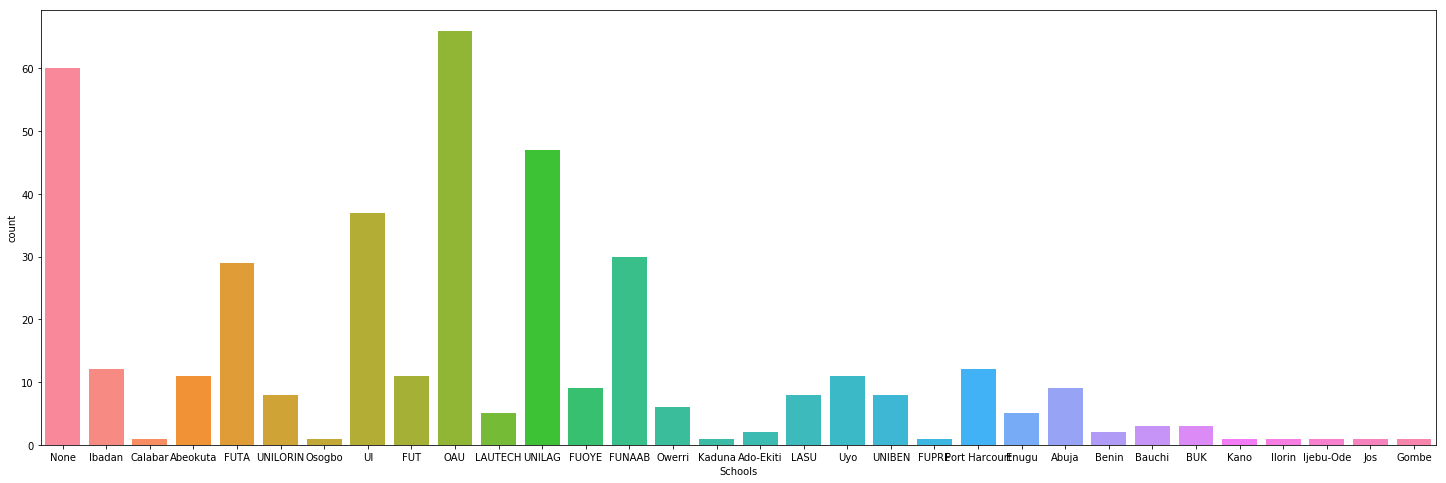

In [18]:
plt.figure(figsize=(25,8))
sns.countplot(df.Schools, orient='v', saturation=1.5)

In [19]:
df.Schools.unique()

array(['None', 'Ibadan', 'Calabar', 'Abeokuta', 'FUTA', 'UNILORIN',
       'Osogbo', 'UI', 'FUT', 'OAU', 'LAUTECH', 'UNILAG', 'FUOYE',
       'FUNAAB', 'Owerri', 'Kaduna', 'Ado-Ekiti', 'LASU', 'Uyo', 'UNIBEN',
       'FUPRE', 'Port Harcourt', 'Enugu', 'Abuja', 'Benin', 'Bauchi',
       'BUK', 'Kano', 'Ilorin', 'Ijebu-Ode', 'Jos', 'Gombe'], dtype=object)

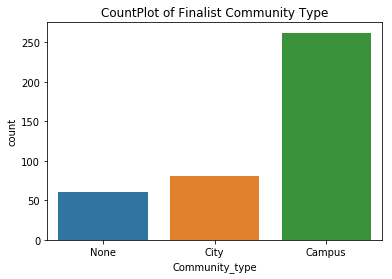

In [20]:
plt.title('CountPlot of Finalist Community Type')
sns.countplot(df['Community_type'])

In [21]:
sns.set(style="darkgrid")

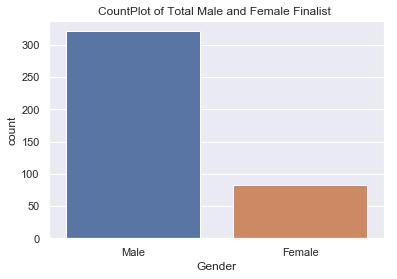

In [22]:
plt.title('CountPlot of Total Male and Female Finalist ')
sns.countplot(data['Gender'])

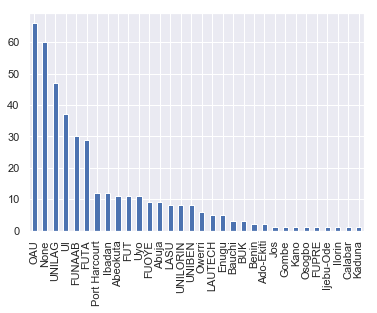

In [23]:
df.Schools.value_counts().plot.bar()

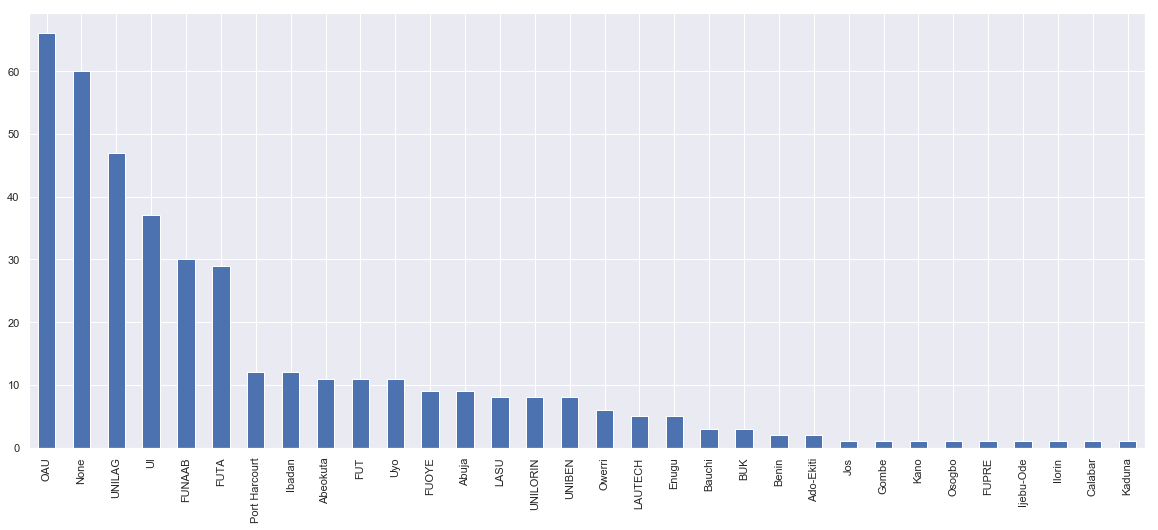

In [24]:
plt.figure(figsize=(20,8))

df.Schools.value_counts().plot.bar()

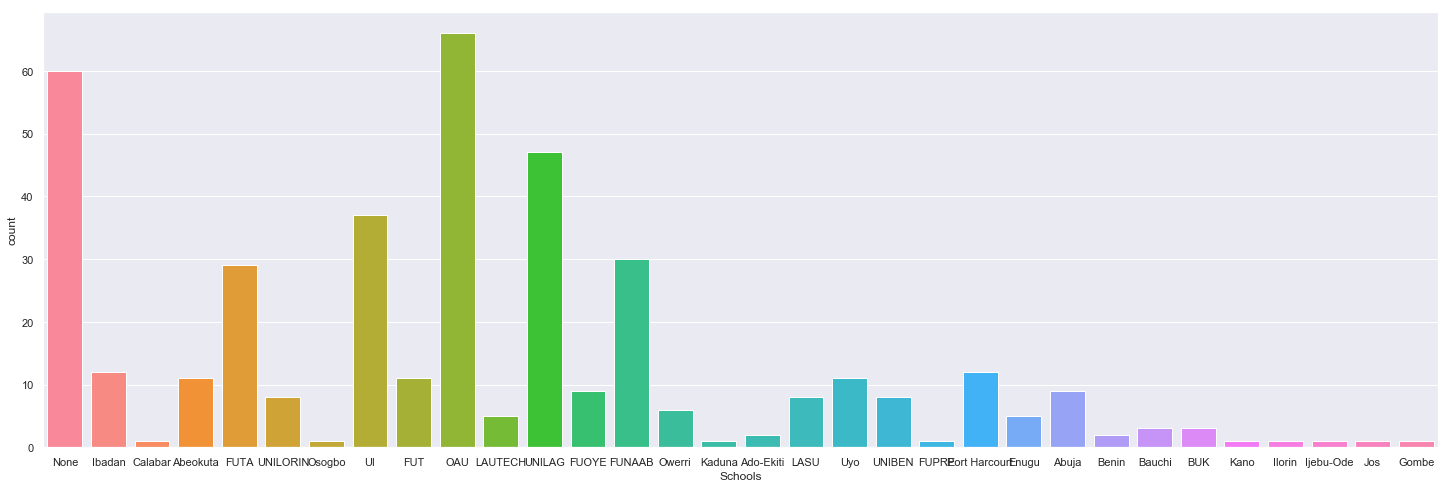

In [25]:
plt.figure(figsize=(25,8))
sns.countplot(df.Schools, orient='v', saturation=1.5)

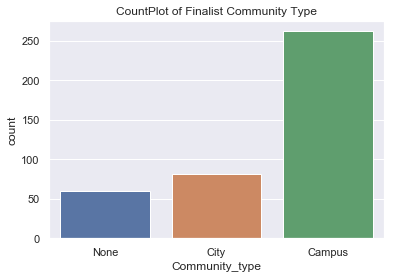

In [26]:
plt.title('CountPlot of Finalist Community Type')
sns.countplot(df['Community_type'])

# Individual Schools

In [27]:
data_futa_loc = []
for i in range(len(data)):
    if data['AI+ Community'][i] == 'Campus- AI+ FUTA':
        data_futa_loc.append(i)
        
print('Length: ', len(data_futa_loc), '\n', data_futa_loc)

Length:  29 
 [4, 18, 22, 67, 70, 93, 100, 119, 122, 128, 147, 186, 198, 213, 216, 219, 221, 269, 284, 288, 302, 306, 322, 353, 364, 369, 373, 391, 400]


In [28]:
futa_data = data.iloc[data_futa_loc]
futa_data

,S/N,Bootcamp ID,Full Name,Gender,AI+ Community
4,5,AIB21/286,AbdulHameed Babatunde,Male,Campus- AI+ FUTA
18,19,AIB21/215,Abisoye Suberu,Male,Campus- AI+ FUTA
22,23,AIB21/71,Adebowale Daniel,Male,Campus- AI+ FUTA
67,68,AIB21/106,Ayodeji Akenroye,Male,Campus- AI+ FUTA
70,71,AIB21/340,Ayomide Daramola,Female,Campus- AI+ FUTA
93,94,AIB21/170,Christopher Somoye,Male,Campus- AI+ FUTA
100,101,AIB21/111,DAUDU PHILIP AYOMIDE,Male,Campus- AI+ FUTA
119,120,AIB21/397,Emmanuel Adeleye,Male,Campus- AI+ FUTA
122,123,AIB21/176,Emmanuel Ebiendele,Male,Campus- AI+ FUTA
128,129,AIB21/85,Emmanuel Samuel,Male,Campus- AI+ FUTA


In [29]:
def get_School_Data(data, sch_name):
    data_sch_loc = []
    for i in range(len(data)):
        if data['AI+ Community'][i] == sch_name:
            data_sch_loc.append(i)
        
    #print('Length: ', len(data_sch_loc))
    
    sch_data = data.iloc[data_sch_loc]
    return sch_data

def get_School_Data_by_Name(data, sch_name):
    data_sch_loc = []
    for i in range(len(data)):
        if data['Schools'][i] == sch_name:
            data_sch_loc.append(i)
            
    sch_data = data.iloc[data_sch_loc]
    return sch_data

# FUTA

In [38]:
futa_data = get_School_Data(data, 'Campus- AI+ FUTA')
futa_data.head()

,S/N,Bootcamp ID,Full Name,Gender,AI+ Community
4,5,AIB21/286,AbdulHameed Babatunde,Male,Campus- AI+ FUTA
18,19,AIB21/215,Abisoye Suberu,Male,Campus- AI+ FUTA
22,23,AIB21/71,Adebowale Daniel,Male,Campus- AI+ FUTA
67,68,AIB21/106,Ayodeji Akenroye,Male,Campus- AI+ FUTA
70,71,AIB21/340,Ayomide Daramola,Female,Campus- AI+ FUTA


In [53]:
gender_futa = futa_data.Gender.value_counts()
gender_futa

Male      28
Female     1
Name: Gender, dtype: int64

In [55]:
print(f'Total Number of FUTA Finalist is {futa_data.shape[0]}')
print('Total Number of FUTA Finalist Male = {}, Female = {}'.format(gender_futa.iloc[0], gender_futa.iloc[1]))

Total Number of FUTA Finalist is 29
Total Number of FUTA Finalist Male = 28, Female = 1


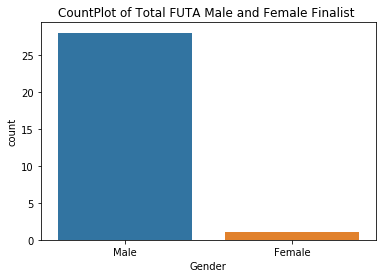

In [40]:
plt.title('CountPlot of Total FUTA Male and Female Finalist ')
sns.countplot(futa_data['Gender'])

# OAU

In [49]:
OAU = get_School_Data(data, 'Campus- AI+ OAU')
OAU.head()

,S/N,Bootcamp ID,Full Name,Gender,AI+ Community
10,11,AIB21/64,Abdulwasiu Tiamiyu,Male,Campus- AI+ OAU
11,12,AIB21/243,Abdurahman Ridwan Opeyemi,Male,Campus- AI+ OAU
13,14,AIB21/2,Abiodun Abayomi,Male,Campus- AI+ OAU
14,15,AIB21/152,Abiodun Gbadamosi,Male,Campus- AI+ OAU
20,21,AIB21/287,Adams Albarka,Male,Campus- AI+ OAU


In [36]:
# OAU2 = get_School_Data_by_Name(df, 'OAU')
# OAU2.head()

In [51]:
gender_oau = OAU.Gender.value_counts()
gender_oau

Male      48
Female    18
Name: Gender, dtype: int64

In [52]:
print(f'Total Number of OAU Finalist is {OAU.shape[0]}')
print('Total Number of OAU Finalist Male = {}, Female = {}'.format(gender_oau.iloc[0], gender_oau.iloc[1]))

Total Number of OAU Finalist is 66
Total Number of OAU Finalist Male = 48, Female = 18


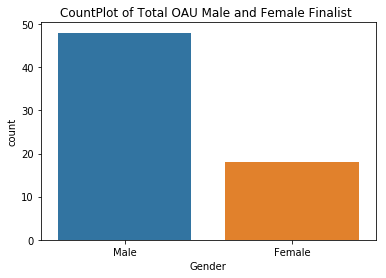

In [37]:
plt.title('CountPlot of Total OAU Male and Female Finalist ')
sns.countplot(OAU['Gender'])

# UNILAG

In [31]:
Unilag = get_School_Data(data, 'Campus- AI+ UNILAG')
Unilag.head()

,S/N,Bootcamp ID,Full Name,Gender,AI+ Community
15,16,AIB21/388,Abiodun Sanni,Male,Campus- AI+ UNILAG
27,28,AIB21/365,Adekemi Kadri,Female,Campus- AI+ UNILAG
37,38,AIB21/403,Adeyinka Sotunde,Male,Campus- AI+ UNILAG
39,40,AIB21/115,Aduragbemi Oyinlola,Male,Campus- AI+ UNILAG
48,49,AIB21/158,Alexander Nwakanma,Male,Campus- AI+ UNILAG


In [33]:
print(f'Total Number of UNILAG Finalist is {Unilag.shape[0]}')

Total Number of UNILAG Finalist is 47


In [36]:
# Unilag_2 = get_School_Data_by_Name(df, 'UNILAG')
# Unilag_2.head()

In [47]:
gender_unilag = Unilag.Gender.value_counts()
gender_unilag

Male      41
Female     6
Name: Gender, dtype: int64

In [46]:
print('Total Number of UNILAG Finalist Male = {}, Female = {}'.format(gender_unilag.iloc[0], gender_unilag.iloc[1]))

Total Number of UNILAG Finalist Male = 41, Female = 6


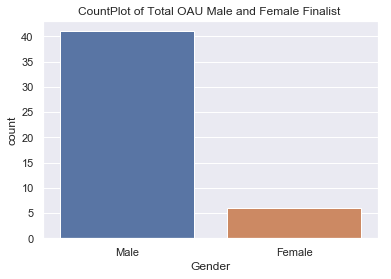

In [32]:
plt.title('CountPlot of Total OAU Male and Female Finalist ')
sns.countplot(Unilag['Gender'])